In [5]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import mlpy

Populating the interactive namespace from numpy and matplotlib


In [6]:
np.random.seed(0)
mean1, cov1, n1 = [1, 4.5], [[1,1],[1,2]], 20  # 20 samples of class 1
x1 = np.random.multivariate_normal(mean1, cov1, n1)
y1 = np.ones(n1, dtype=np.int)
mean2, cov2, n2 = [2.5, 2.5], [[1,1],[1,2]], 30 # 30 samples of class 2
x2 = np.random.multivariate_normal(mean2, cov2, n2)
y2 = 2 * np.ones(n2, dtype=np.int)
x = np.concatenate((x1, x2), axis=0) # concatenate the samples
y = np.concatenate((y1, y2))
K = mlpy.kernel_gaussian(x, x, sigma=3) # compute the kernel matrix

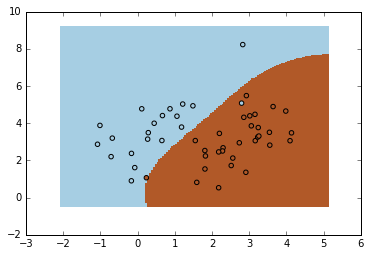

In [7]:
kfda = mlpy.KFDA(lmb=0.01)
kfda.learn(K, y) # compute the tranformation vector
z = kfda.transform(K) # embedded x into the kernel fisher space
knn = mlpy.KNN(k=5)
knn.learn(z, y) # learn KNN in the kernel fisher space
xmin, xmax = x[:,0].min()-1, x[:,0].max()+1
ymin, ymax = x[:,1].min()-1, x[:,1].max()+1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.05), np.arange(ymin, ymax, 0.05))
xt = np.c_[xx.ravel(), yy.ravel()]
Kt = mlpy.kernel_gaussian(xt, x, sigma=3) # compute the kernel matrix Kt
zt = kfda.transform(Kt) # embedded xt into the kernel fisher space
yt = knn.pred(zt).reshape(xx.shape) # perform the KNN prediction in the kernel fisher space
plt.figure(1)
cmap = plt.set_cmap(plt.cm.Paired)
plot1 = plt.pcolormesh(xx, yy, yt)
plot2 = plt.scatter(x[:,0], x[:,1], c=y)
plt.show()